In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,62_ma,91_ma,Strategy,Asset_Returns,Strategy_Returns
1,24.553843,44.250000,44.250000,43.968750,43.968750,480500,44.096270,44.095467,-1.0,0.007112,-0.007112
2,24.605865,44.343750,44.375000,44.125000,44.218750,201300,44.181439,44.180054,1.0,0.009246,-0.005009
3,24.865971,44.812500,44.843750,44.375000,44.406250,529400,44.346918,44.343415,1.0,0.019915,0.005509
4,24.970016,45.000000,45.093750,44.468750,44.968750,531500,44.486095,44.480567,1.0,0.024182,0.009716
5,24.952665,44.968750,45.062500,44.718750,44.968750,492100,44.573162,44.566466,1.0,0.023471,0.009015
...,...,...,...,...,...,...,...,...,...,...,...
8196,635.549988,635.549988,637.969971,633.809998,636.280029,54805800,618.961146,610.340749,1.0,13.464865,3.289898
8197,645.309998,645.309998,646.500000,637.250000,637.760010,84083200,619.797618,611.100950,1.0,13.686999,3.355777
8198,642.469971,642.469971,645.289978,642.349976,644.039978,51274300,620.517375,611.782886,1.0,13.622361,3.336607
8199,645.159973,645.159973,645.510010,641.570007,642.200012,51581600,621.299680,612.508475,1.0,13.683584,3.354765


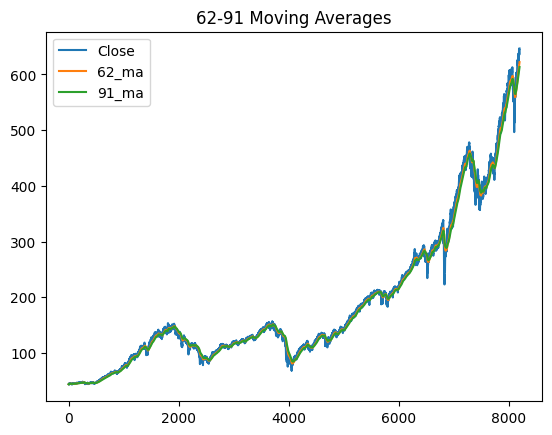

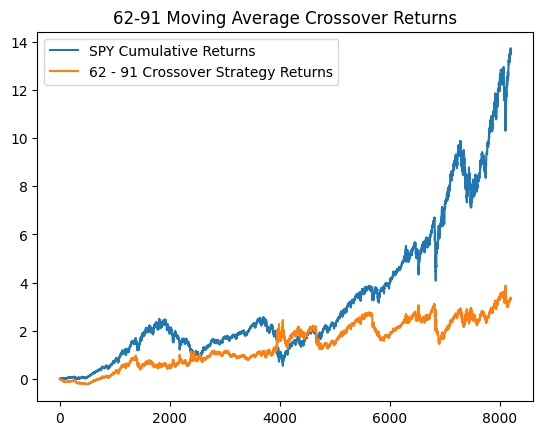

In [4]:
TICKER = 'SPY'
INTERVAL='1d'

# set period based on interval
if INTERVAL == '1h':
    PERIOD = '730d'
else:
    PERIOD = 'max'
LOOKBACK = 10000

FAST = 62
SLOW = 91

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):

    # get data at interval you want
    df = yf.download(ticker, interval=interval, auto_adjust=False)
    df.columns = df.columns.get_level_values(0)

    # reset the index to make plots prettier
    df = df.reset_index(drop=True)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].ewm(span=fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].ewm(span=slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()